## **Stock Price Prediction using Time Series Analysis**

### **First I have to import the required Dataset from available sources. I have pasted a Dataset of BAJAJFINSV stock in the directory. We have to import the csv file into the program.**

In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv("/content/BAJFINANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


### **I have to set the 'Date' Column from the dataset as an Index of the csv file.**

In [26]:
df.set_index('Date',inplace = True)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


### **Let's first see the target variable VWAP (Volume Weighted Average Price) over time**

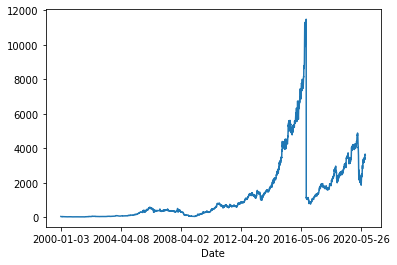

In [27]:
df['VWAP'].plot()

# **Let's Pre-Process the imported data**

### **Let us see the number of datas available and the number of different attribute (Columns).**

In [28]:
df.shape

(5070, 14)

**As we can see, there are total 5070 data samples and 14 columns. This is not a lot of data comparing with the real world data sets. There maybe a scenario where some datas are unavailable or blank. Let us first find out the number of blank data samples.**

In [29]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

**Here we can see, the columns "Trades" have 2779 blank data cell. Column 'Deliverable Volume' and '%Deliverable' have 446 blank data cells each.** 

**In such situations, we can either drop those empty data samples entirely, or we can impute those blank data samples using imputer function and its various strategies like 'Mean', 'Median', etc.**

**But to impute the data, we have to separate the Numeric columns from the Categorical columns.**

In [30]:
import numpy as np

In [31]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

**I'm choosing to use 'Mean' strategy to impute the numeric data**

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(df[numeric_cols])

df[numeric_cols] = imputer.transform(df[numeric_cols])

**As you can see below, after  imputation there's no blank data values in the sample**

In [34]:
df[numeric_cols].isna().sum()

Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

**Let's merge the numeric columns and categorical columns in the dataframe again**

In [35]:
df = df[numeric_cols + categorical_cols]

In [36]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Symbol,Series
Date,,,,,,,,,,,,,,
2000-01-03,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600.0,3.803800e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ
2000-01-04,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000.0,2.428000e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ
2000-01-05,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500.0,1.591450e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ
2000-01-06,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200.0,2.754750e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ
2000-01-07,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500.0,1.555550e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ


**Let's make a copy of the previous dataframe, so that we wont be making any changes in the original Dataframe.**

In [40]:
data=df.copy()

In [41]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [42]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [43]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [44]:
data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Symbol,Series,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600.0,3.803800e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000.0,2.428000e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500.0,1.591450e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ,50.450000,NaN,46.333333,NaN,5366.666667,NaN,2.607750e+10,NaN,47105.843736,NaN,2.911615,NaN,1.656301,NaN,2074.447718,NaN,1.117075e+10,NaN,0.0,NaN
2000-01-06,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200.0,2.754750e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ,48.866667,NaN,44.866667,NaN,4900.000000,NaN,2.258067e+10,NaN,47105.843736,NaN,3.817504,NaN,2.909181,NaN,1352.774926,NaN,5.999789e+09,NaN,0.0,NaN
2000-01-07,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500.0,1.555550e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ,47.133333,NaN,42.900000,NaN,4400.000000,NaN,1.967250e+10,NaN,47105.843736,NaN,1.026320,NaN,1.473092,NaN,1558.845727,NaN,6.822312e+09,NaN,0.0,NaN


In [45]:
data.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
       'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble', 'Symbol',
       'Series', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [46]:
data.shape

(5070, 34)

In [47]:
data.isna().sum()

Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Symbol                    0
Series                    0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

**As we see above, there are less numbers of blank data. We can now drop the data as there is more than enough data available here.**

In [48]:
data.dropna(inplace=True)

In [49]:
data.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
       'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble', 'Symbol',
       'Series', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [50]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

**Now we have to split the data set into training and test data**

In [51]:
training_data=data[0:3500]
test_data=data[3500:]

In [52]:
training_data

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Symbol,Series,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-11,42.90,42.00,42.00,39.50,40.25,40.10,40.25,5500.0,2.213900e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ,44.966667,47.464286,40.833333,43.371429,4566.666667,5142.857143,1.921850e+10,2.334793e+10,47105.843736,47105.843736,3.000556,3.709528,1.258306,3.052712,1006.644591,1466.125441,3.353967e+09,7.780466e+09,0.000000,0.000000
2000-01-12,40.10,40.00,40.00,39.00,39.00,39.00,39.80,1000.0,3.980000e+09,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ,42.300000,45.928571,39.833333,42.300000,3733.333333,4200.000000,1.536000e+10,1.848250e+10,47105.843736,47105.843736,2.463737,4.300664,1.040833,3.087610,2400.694344,1722.401424,9.915353e+09,7.711740e+09,0.000000,0.000000
2000-01-13,39.00,40.00,41.00,38.50,39.50,39.50,39.37,1000.0,3.937000e+09,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ,41.000000,44.185714,39.000000,40.957143,2500.000000,3628.571429,1.001867e+10,1.557636e+10,47105.843736,47105.843736,1.000000,3.191880,0.500000,2.146980,2598.076211,2045.901827,1.049654e+10,8.903806e+09,0.000000,0.000000
2000-01-14,39.50,39.00,40.50,39.00,39.90,39.90,39.72,1700.0,6.752000e+09,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ,40.500000,43.200000,38.833333,40.157143,1233.333333,3371.428571,4.889667e+09,1.426743e+10,47105.843736,47105.843736,0.500000,3.097849,0.288675,1.513117,404.145188,2173.870807,1.612971e+09,9.499372e+09,0.000000,0.000000
2000-01-17,39.90,39.05,41.00,38.40,39.20,39.20,39.84,3100.0,1.234950e+10,47105.843736,141968.990484,0.643712,BAJAUTOFIN,EQ,40.833333,42.485714,38.633333,39.628571,1933.333333,2928.571429,7.679500e+09,1.209629e+10,47105.843736,47105.843736,0.288675,2.915721,0.321455,1.359797,1069.267662,1782.053390,4.282258e+09,7.480525e+09,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-23,1765.15,1766.05,1851.00,1766.00,1851.00,1826.75,1812.89,50048.0,9.073138e+12,2906.000000,38194.000000,0.763100,BAJFINANCE,EQ,1812.966667,1800.264286,1759.133333,1757.207143,95179.333333,70945.714286,1.693151e+13,1.260043e+13,2702.666667,2560.285714,33.470933,23.888887,6.087145,6.143589,61578.121052,51755.232292,1.081884e+13,9.150816e+12,507.527668,535.603620
2014-04-25,1826.75,1848.35,1848.35,1786.60,1814.50,1813.00,1807.89,22664.0,4.097405e+12,2873.000000,18291.000000,0.807100,BAJFINANCE,EQ,1829.116667,1806.457143,1769.000000,1761.007143,79347.000000,72186.857143,1.414715e+13,1.282912e+13,2634.666667,2493.857143,35.632721,30.125908,16.308280,12.790114,75710.957642,50243.435652,1.333175e+13,8.871975e+12,441.692578,444.088741
2014-04-28,1813.00,1839.30,1860.00,1802.00,1848.55,1856.80,1837.67,19005.0,3.492483e+12,1633.000000,14460.000000,0.760900,BAJFINANCE,EQ,1853.116667,1817.964286,1784.866667,1769.007143,30572.333333,72283.000000,5.554342e+12,1.286777e+13,2470.666667,2446.142857,6.106622,33.306590,18.062484,18.205870,16965.354825,50123.707870,3.062340e+12,8.823609e+12,725.628234,521.352225


In [53]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 27.4MB/s 
     |████████████████████████████████| 9.5MB 40.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


**Let's import the auto_arima library from pmdarima.**

In [54]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

**Let's create a best ARIMA model here**

In [55]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=24332.673, Time=11.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25660.919, Time=6.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=24898.937, Time=6.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=24529.359, Time=9.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50721.736, Time=5.85 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=24523.958, Time=10.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=24355.273, Time=9.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=24337.045, Time=11.80 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=24330.220, Time=11.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=24331.058, Time=11.19 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=24327.841, Time=11.74 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=24327.989, Time=13.09 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=24327.236, Time=13.26 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=24329.660, Time=13.24 sec
 ARIMA(4,0

In [56]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 5), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

**Here I'm using the previously created model to predict the forecast**

In [57]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [58]:
test_data['Forecast_ARIMA']=forecast

**Let's see the original values vs the predicted valued done by the model**

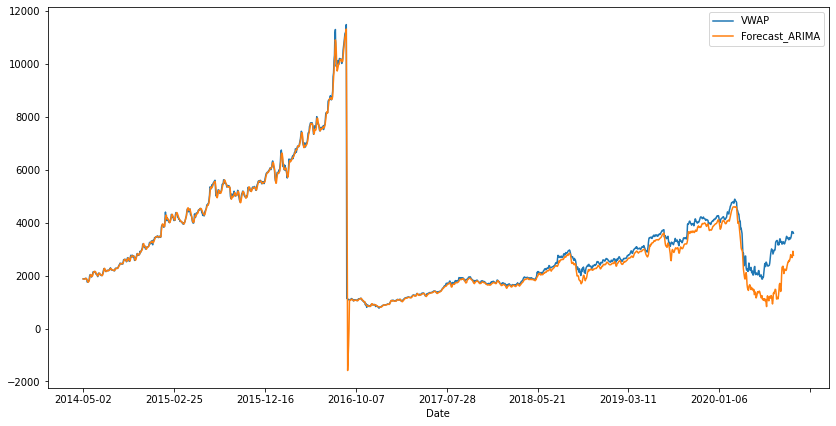

In [59]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [61]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

397.24358397832873

In [62]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

177.1468135420309